### App Rating Prediction

In [1]:
#Load the data file using pandas.
import pandas as pd
data = pd.read_csv('googleplaystore.csv')

In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check for null values in the data. Get the number of null values for each column.
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#Drop records with nulls in any of the columns. 
data = data.dropna()

In [5]:
#Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [6]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float) & Last updated as Datetime.
data['Reviews'] = data['Reviews'].astype(int)
data['Last Updated'] = data['Last Updated'].astype('datetime64[ns]')

In [7]:
#check size column values if they are any inconsistency
data['fal'] = data['Size'].str.strip().str[-1]
data['fal'].unique()

array(['M', 'e', 'k'], dtype=object)

In [8]:
data = data.drop("fal",axis=1)

In [9]:
#Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
def convert_to_float(x):
    if type(x) == int or type(x) == float:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', ''))
        return 1.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000
        return 1000.0
    if 'e' in x:
        return 0.0

data['Size'] = data['Size'].apply(convert_to_float)

In [10]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [11]:
#Installs field is currently stored as string and has values like 1,000,000+. 
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer
data['Installs'] = data['Installs'].str.replace('+','', regex=False)
data['Installs'] = data['Installs'].str.replace(',','', regex=False)
data['Installs'] = data['Installs'].astype(int)

In [12]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [13]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
data['Price'] = data['Price'].str.replace('$','', regex=False)
data['Price'] = data['Price'].astype(float)

In [14]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   int32         
 4   Size            9360 non-null   float64       
 5   Installs        9360 non-null   int32         
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 950.6+ KB


## Sanity Checks

In [16]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.
data1 = data[(data['Rating'] > 5.0) & (data['Rating'] < 1.0)].index
data.drop(data1, inplace = True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [17]:
#Reviews should not be more than installs as only those who installed can review the app.
#If there are any such records, drop them.
data2 = data[(data['Reviews']>data['Installs'])].index
data.drop(data2, inplace=True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [18]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
data3 = data[(data['Type'] == "Free") & (data['Price'] > 0)].index
data.drop(data3, inplace=True)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


## Performing univariate analysis & Removing Outliers

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

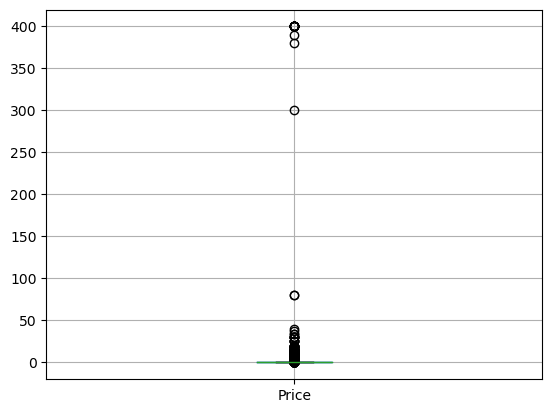

In [20]:
#Boxplot for Price
data.boxplot(column = ['Price'])

indeed there are some outliers in the Price column,i.e., there are some apps whose price is more than usual apps on the Googleplaystore

In [21]:
# Remove outliers
# easy way to remove outliers
def outliers (data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data= data.loc[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),]
    return data

data = data.loc[data["Price"] < 200 ,]

<AxesSubplot:>

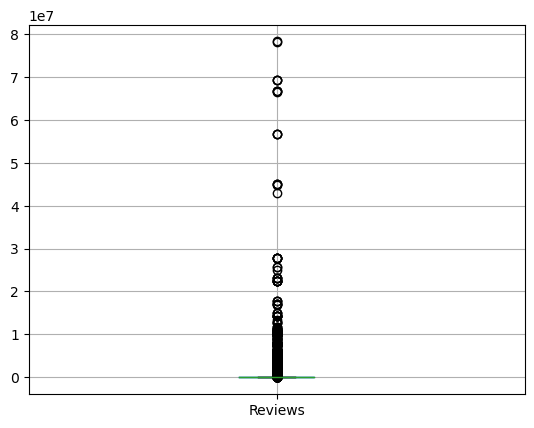

In [22]:
#Boxplot for Reviews
data.boxplot(column = ['Reviews'])

Indeed there are some apps that have very high number of Reviews

In [23]:
# Remove outliers
data = outliers(data,"Reviews")

(array([  17.,   18.,   41.,   74.,  136.,  442.,  853., 1526., 3046.,
        1557.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

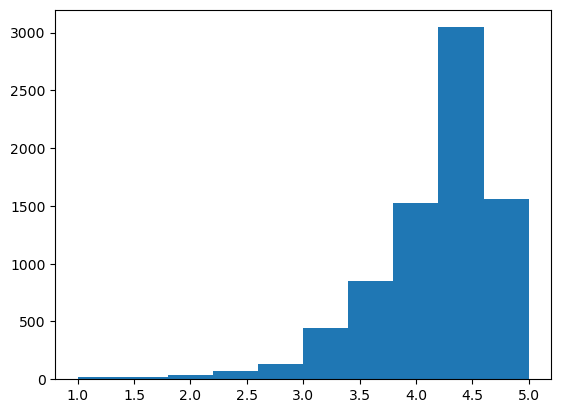

In [24]:
#Histogram for Rating
plt.hist(data["Rating"])

It's left skewed (negetively skewed)
some apps seem to have higher Ratings than usual

(array([3924., 1260.,  908.,  525.,  388.,  221.,  166.,   99.,   91.,
         128.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

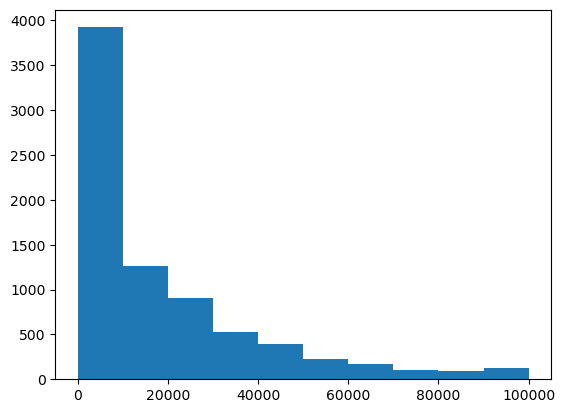

In [25]:
#Histogram for Size
plt.hist(data["Size"])

It's right skewed (positively skewed), 

### Bivariate analysis (Scatter plots)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

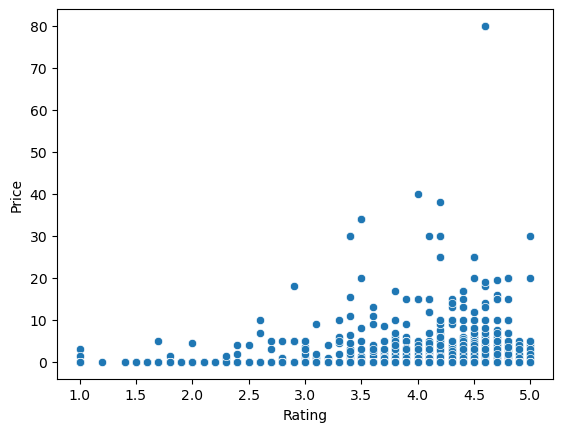

In [26]:
#1) Scatter plot/jointplot for Rating Vs. Price
sns.scatterplot(x = 'Rating', y = 'Price',data=data)

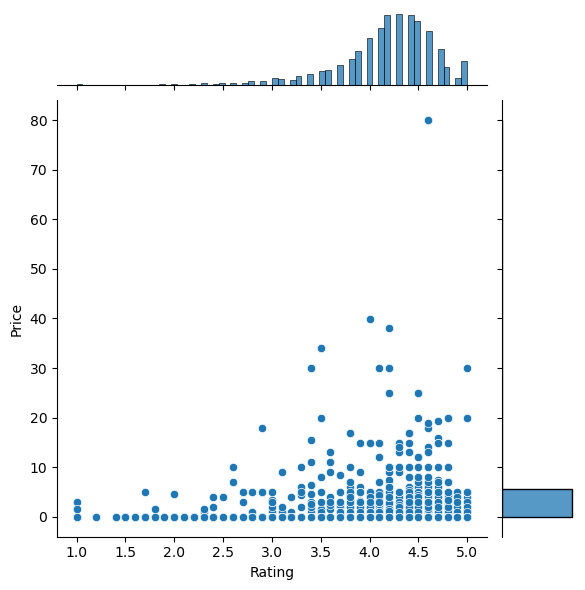

In [27]:
sns.jointplot(x= 'Rating',y= 'Price',data= data)

Both the plots show a positive linear relationship; as the price of an app increases its rating also increases. **That states the paid apps have the highest of Ratings**

<AxesSubplot:xlabel='Rating', ylabel='Size'>

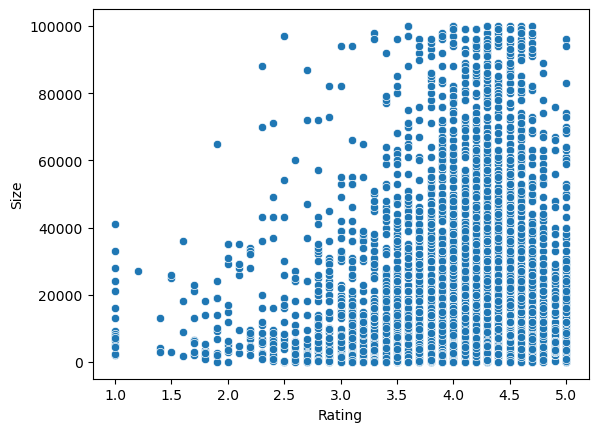

In [28]:
#2) Scatterplot/jointplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data= data)

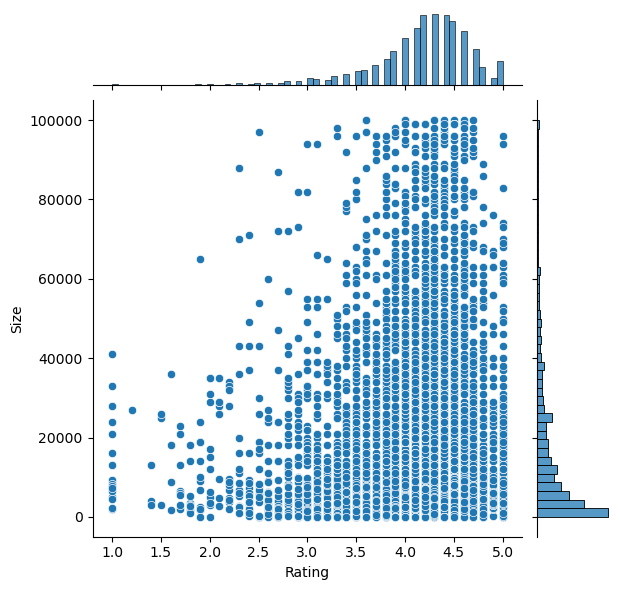

In [29]:
sns.jointplot(x= 'Rating', y= 'Size', data= data)

The plots show a positive linear relationship; as the Size increases the Ratings increases. **This stats the heavier apps are rated better**

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

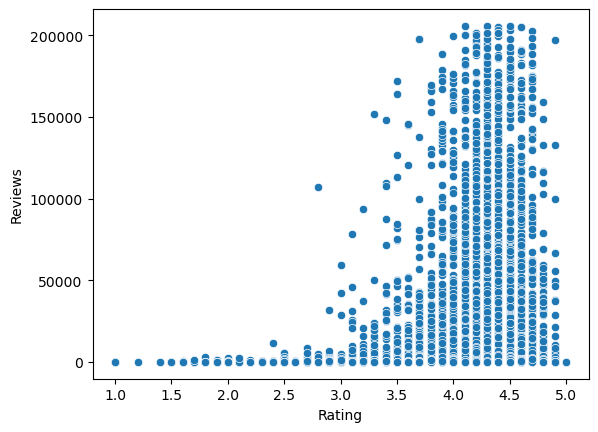

In [30]:
#3) Scatterplot for Ratings Vs. Reviews
sns.scatterplot(x= 'Rating',y= 'Reviews', data= data)

The plot shows a positive linear relationship between Ratings and Reviews. **More reviews mean better ratings indeed**

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

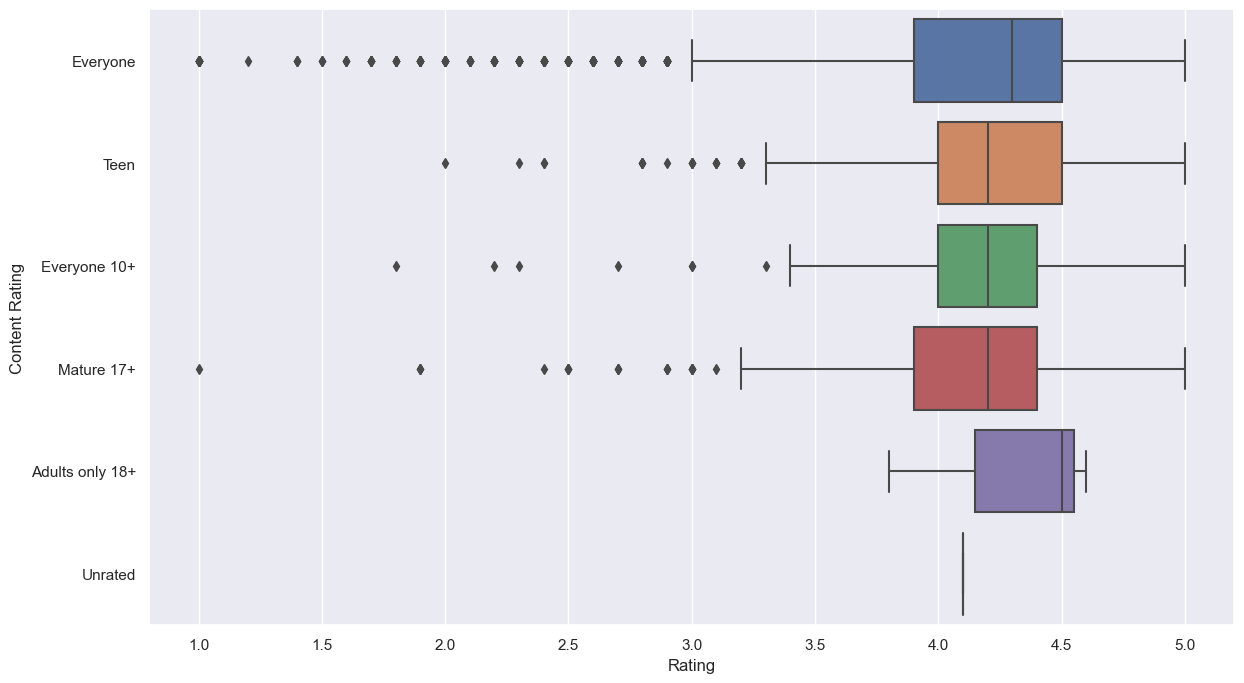

In [31]:
#4) Boxplot for Ratings Vs. Content Rating
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = data)

The above plot shows the apps for Everyone is worst rated as it contain the highest number of outliers followed by apps for Mature 17+ and Everyone 10+ along with Teen. **The catergory Adults only 18+ is rated better and falls under most liked type**

<AxesSubplot:xlabel='Rating', ylabel='Category'>

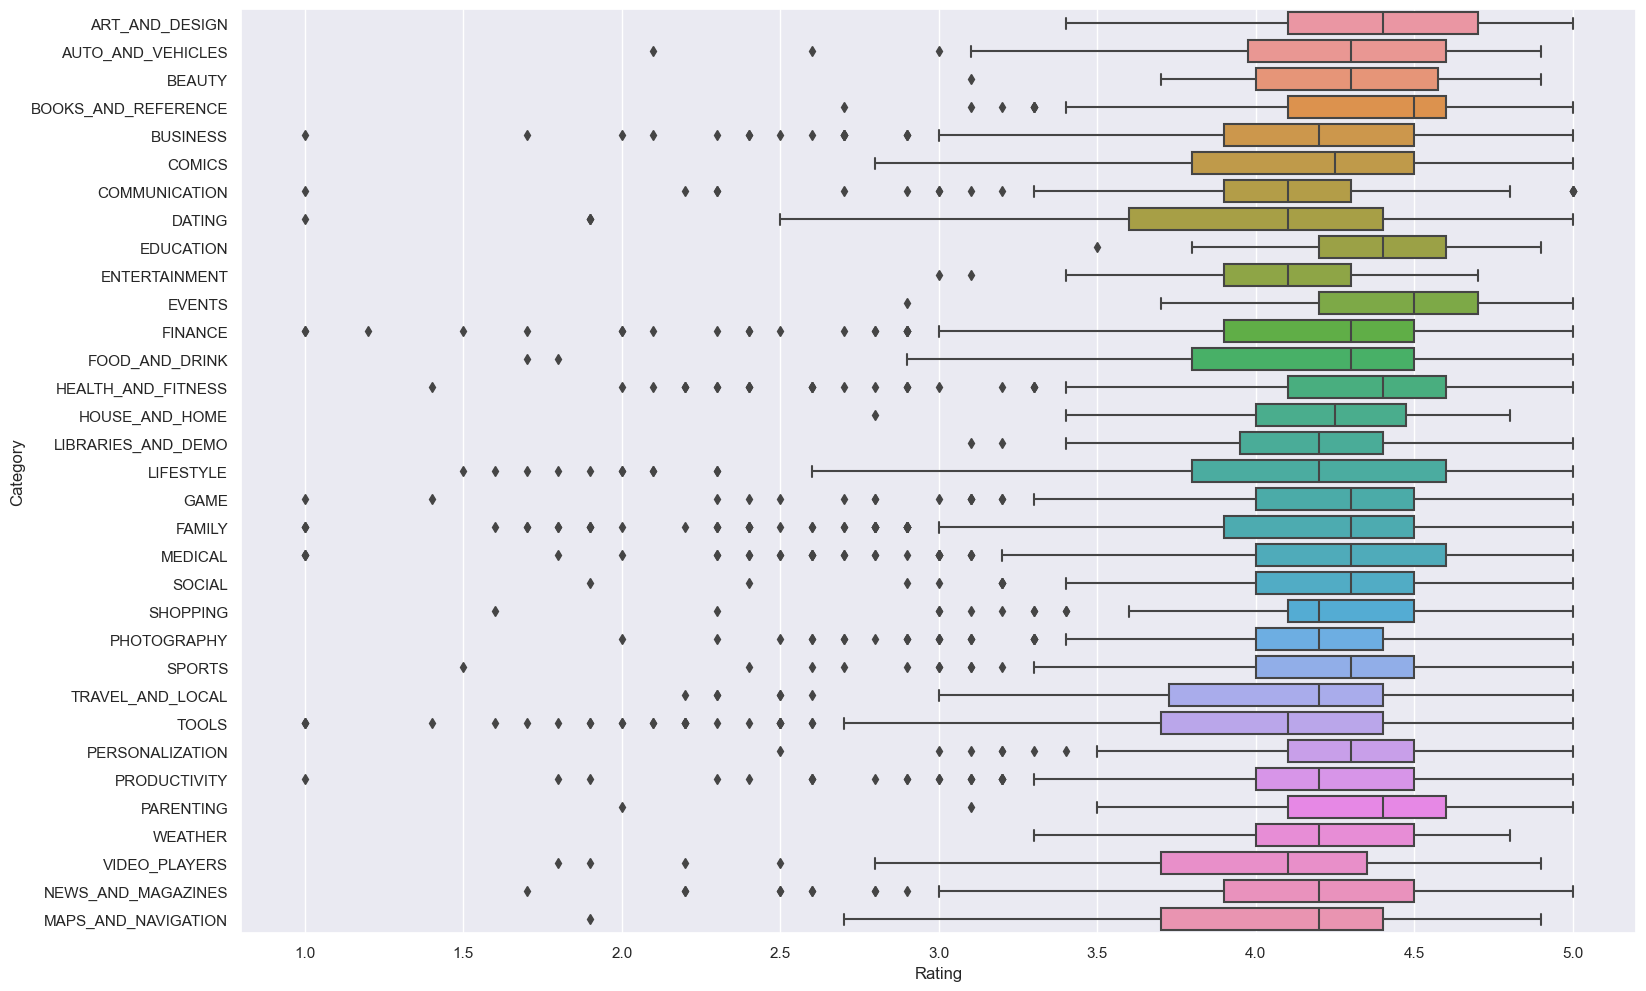

In [32]:
#5) Boxplot for Ratings Vs. Category
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x= 'Rating', y = 'Category', data= data)

It is showing the average rating for different category across the types. We don't find much of a significant difference among different categories

### Data Processing

In [33]:
p1 = data.copy()

Reviews and Installs column still have some relatively high values, before building the linear regression model we need to reduce the skew; columns needs log transformation

In [34]:
# Log transformation
import numpy as np
p1["Reviews"] = np.log(p1["Reviews"])
p1["Installs"] = np.log(p1["Installs"])

In [35]:
# delete unnecessary columns
p1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1,inplace=True)

In [36]:
p1.head(2)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210340,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122363,0.0,Everyone,Art & Design;Pretend Play


As Model does not understand any Catergorical variable hence these need to be converted to numerical

Dummy Encoding is one way to convert these columns into numerical

In [37]:
#3) create a copy of dataframe
p2 = p1
p2.head(5)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210340,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122363,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379508,8700.0,15.424948,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.874198,2800.0,11.512925,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.117994,5600.0,10.819778,0.0,Everyone,Art & Design


In [38]:
#get unique values in column category
p2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [39]:
#Storing the column into x varible and delete the category col from dataframe p2
#And concat the encoded cols to the dataframe p2
def generate_dummies(df, col):
    df[col] = pd.Categorical(df[col])

    x = df[[col]]
    del df[col]

    dummies = pd.get_dummies(x, prefix=col)
    df = pd.concat([df, dummies], axis=1)
    return df

p2 = generate_dummies(p2, 'Category')

In [40]:
#get unique values in Column Genres
p2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Casual;Creativity', 'Board', 'Simulation',
       'Racing', 'Role Playing', 'Strategy', 'Sports',
       'Simulation;Education', 'Action;Action & Adventure', 'Card',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Educational;Creativity', 'Puzzle;Brain G

There are too many categories under Genres. Hence, we will try to reduce some genres which have very few samples under them and put them under one new common category i.e. "Other"

In [41]:
# create a empty list
lists = []
#if a genre has count of less than 20 then add it to the list
for i in p2.Genres.value_counts().index:
    if p2.Genres.value_counts()[i]<20:
        lists.append(i)

p2.Genres = ['Other' if i in lists else i for i in p2.Genres]
p2['Genres'].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Casual', 'Puzzle', 'Action', 'Arcade', 'Board',
       'Simulation', 'Racing', 'Role Playing', 'Strategy', 'Sports',
       'Card', 'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino', 'Trivia'], dtype=object)

In [42]:
p2 = generate_dummies(p2, 'Genres')

In [43]:
p2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather
0,4.1,5.068904,19000.0,9.210340,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,14000.0,13.122363,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379508,8700.0,15.424948,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.874198,2800.0,11.512925,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.117994,5600.0,10.819778,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#getting the unique values in Column "Content Rating"
p2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [45]:
p2 = generate_dummies(p2, 'Content Rating')
p2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.068904,19000.0,9.210340,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.874198,14000.0,13.122363,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379508,8700.0,15.424948,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.874198,2800.0,11.512925,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.117994,5600.0,10.819778,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

Separate the dataframes into X_train, y_train, X_test, and y_test

In [46]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [47]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature 
data2 = p2
X = data2.drop('Rating',axis=1)
y = data2['Rating']

#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

### Model Building & Evaluation

Model building Use linear regression as the technique Report the R2 on the train set

In [48]:
#Create a linear reggression obj by calling the linear reggressor algorithm
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,y_train)

LinearRegression()

In [49]:
R2_Score_train_data = round(lin_reggressor.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_train_data))

The R2 value of the Training Set is : 0.145


Make predictions on test set and report R2.

In [51]:
# test the output by changing values, like 3750
y_pred = lin_reggressor.predict(X_test)
R2_Score_test_data =metrics.r2_score(y_test,y_pred)
R2_Score_test_data

0.10284535151027041

In [52]:
R2_Score_test_data = round(lin_reggressor.score(X_test,y_test),3)
print("The R2 value of the Test Set is : {}".format(R2_Score_test_data))

The R2 value of the Test Set is : 0.103
